In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('../datasets/pca-tone-clusters.xlsx')

In [5]:
# List of columns to plot
columns_to_plot = ['age', 'disability', 'education', 'employment', 'ethnicity', 'gender', 'income', 'language', 'marital_status', 'race', 'tone']

## Principal Component Analysis

### Visualization by Cluster

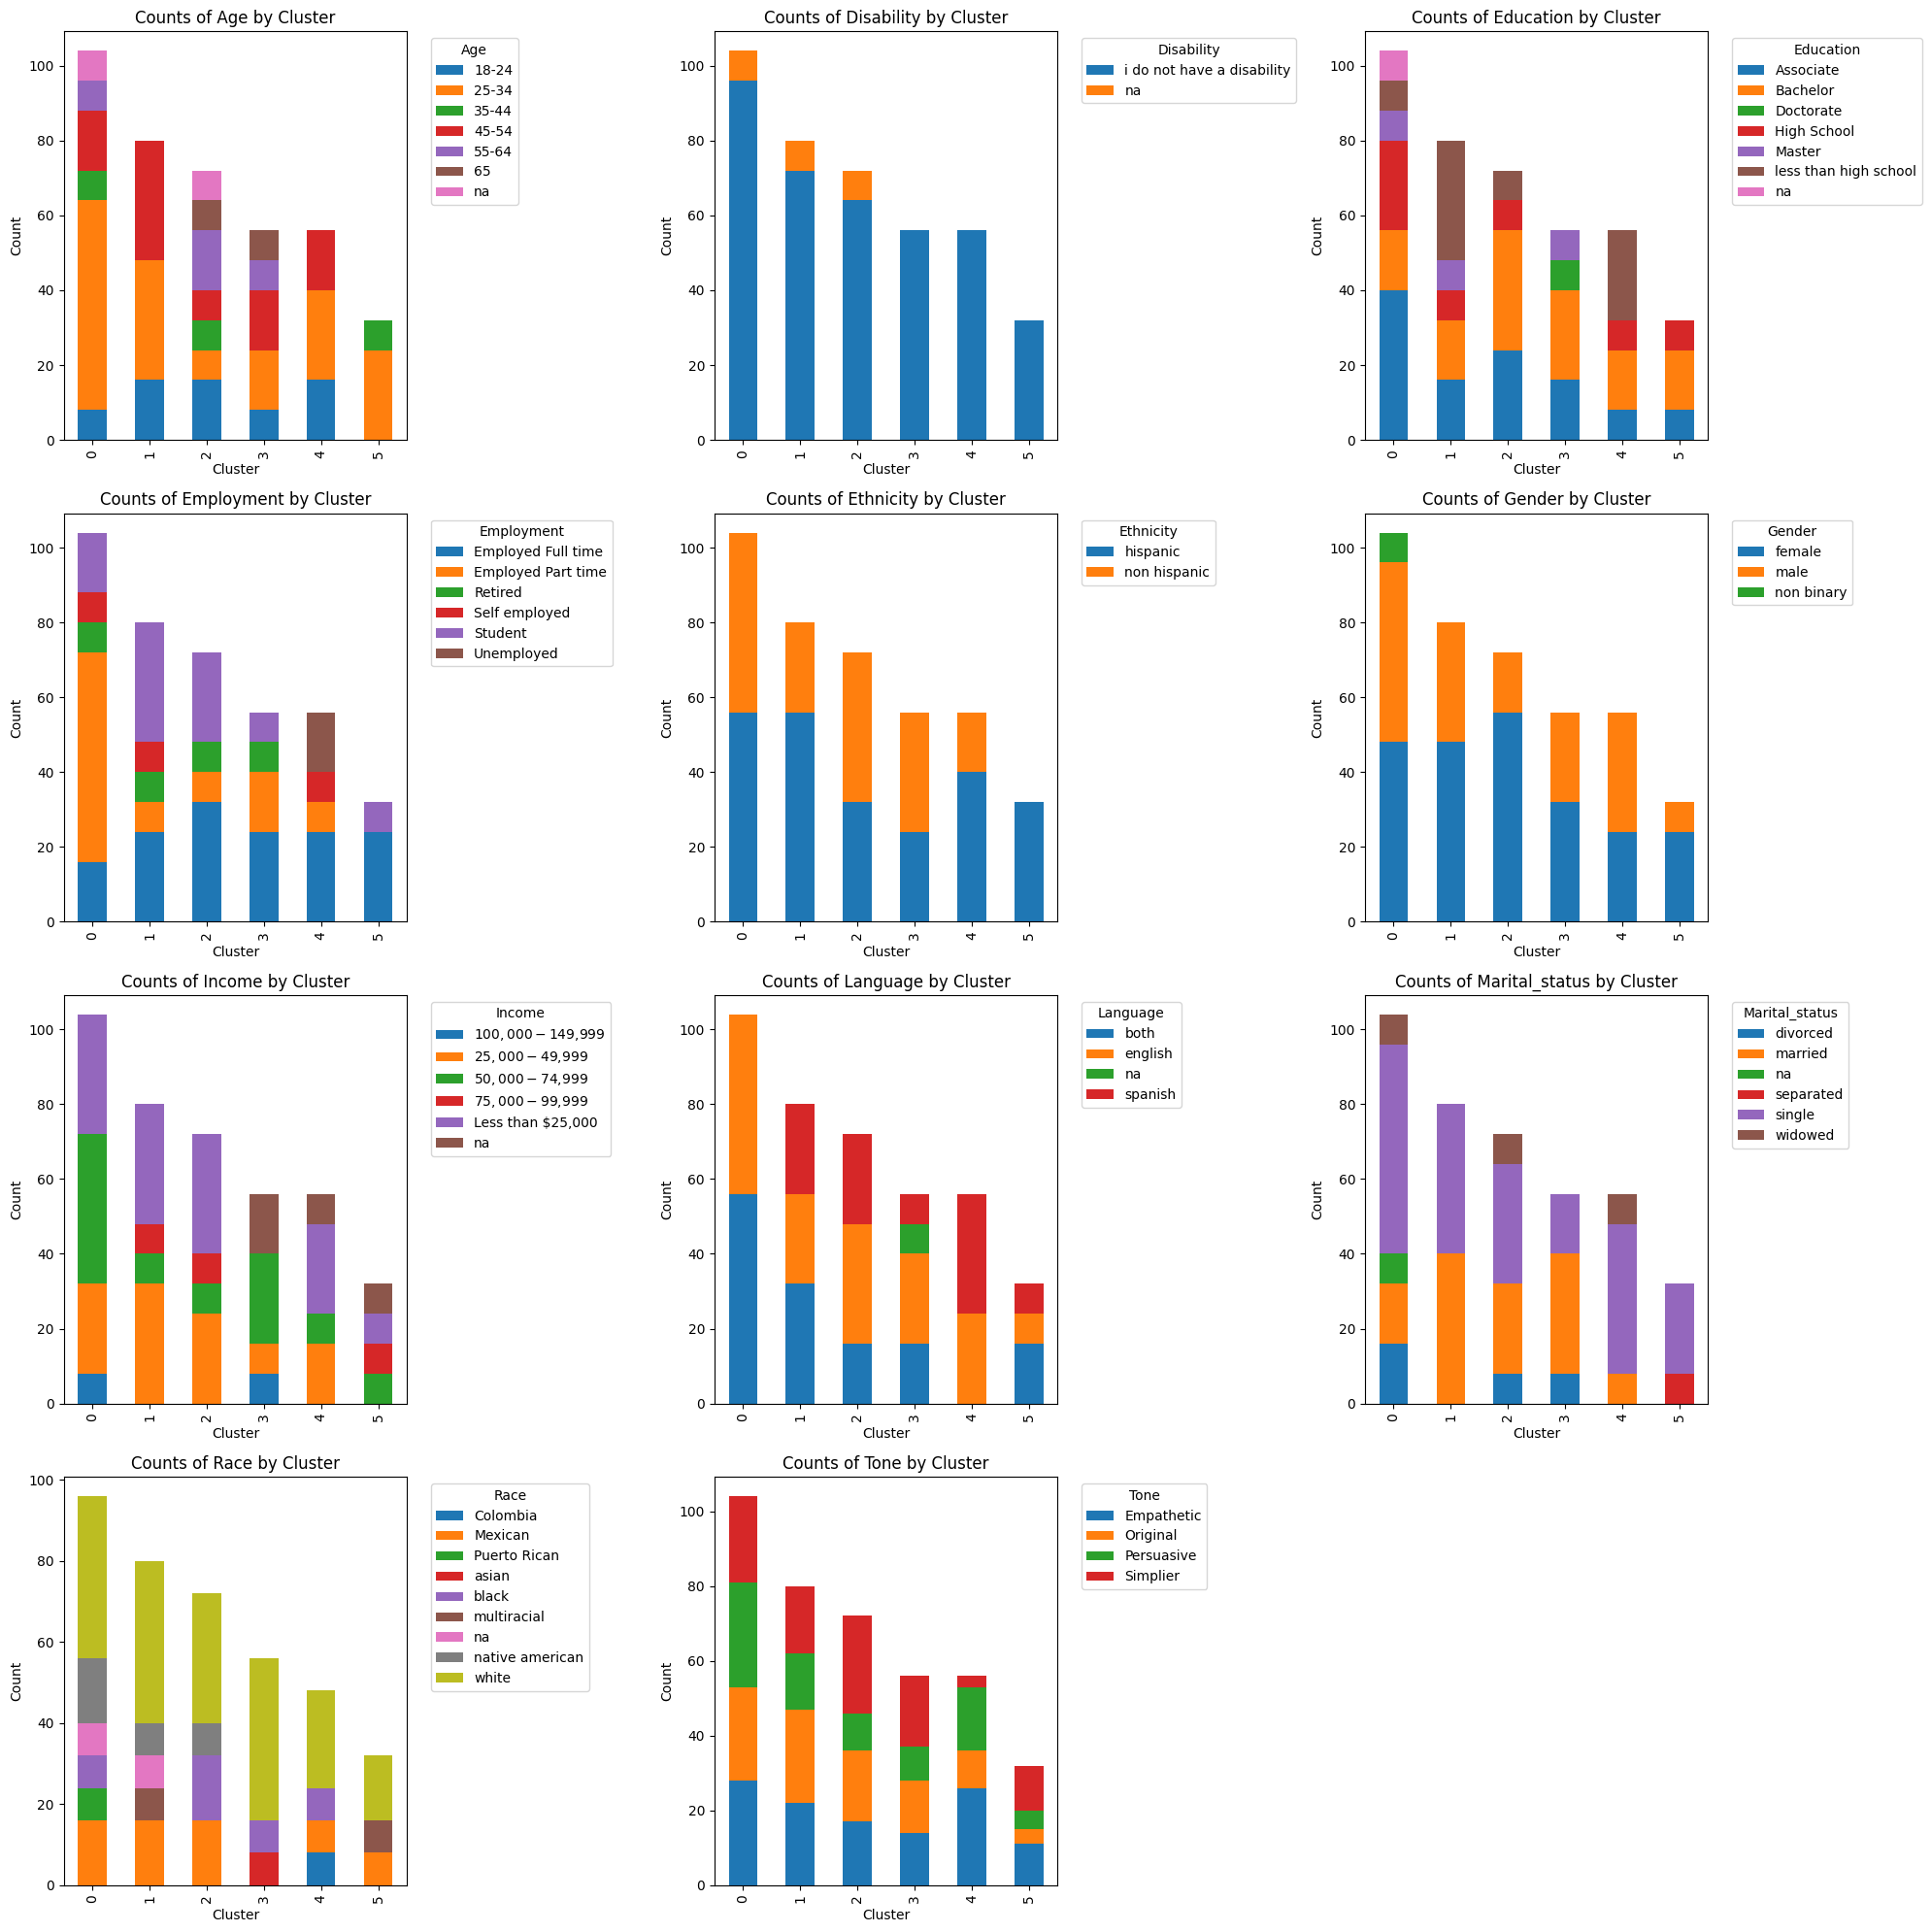

In [6]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = df.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

In [7]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots using Plotly
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns_to_plot, shared_yaxes=True)

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot, start=1):
    # Aggregate data for the given column
    cluster_option_counts = df.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Prepare data for plotting
    data = []
    for cluster in cluster_option_counts.index:
        trace = go.Bar(x=cluster_option_counts.columns, y=cluster_option_counts.loc[cluster], name=f'Cluster {cluster}')
        data.append(trace)
    
    # Add traces to the subplot
    row = (idx - 1) // n_cols + 1
    col = (idx - 1) % n_cols + 1
    fig.add_traces(data, rows=row, cols=col)
    
    # Update layout for each subplot
    fig.update_xaxes(title_text='Cluster', row=row, col=col)
    fig.update_yaxes(title_text='Count', row=row, col=col)
    fig.update_layout(title=f'Counts of {column.capitalize()} by Cluster', showlegend=True)

# Update subplot layout and show the figure
fig.update_layout(height=800, width=1200, title_text="Cluster Analysis Visualization")
fig.show()


### Visualization by Attribute

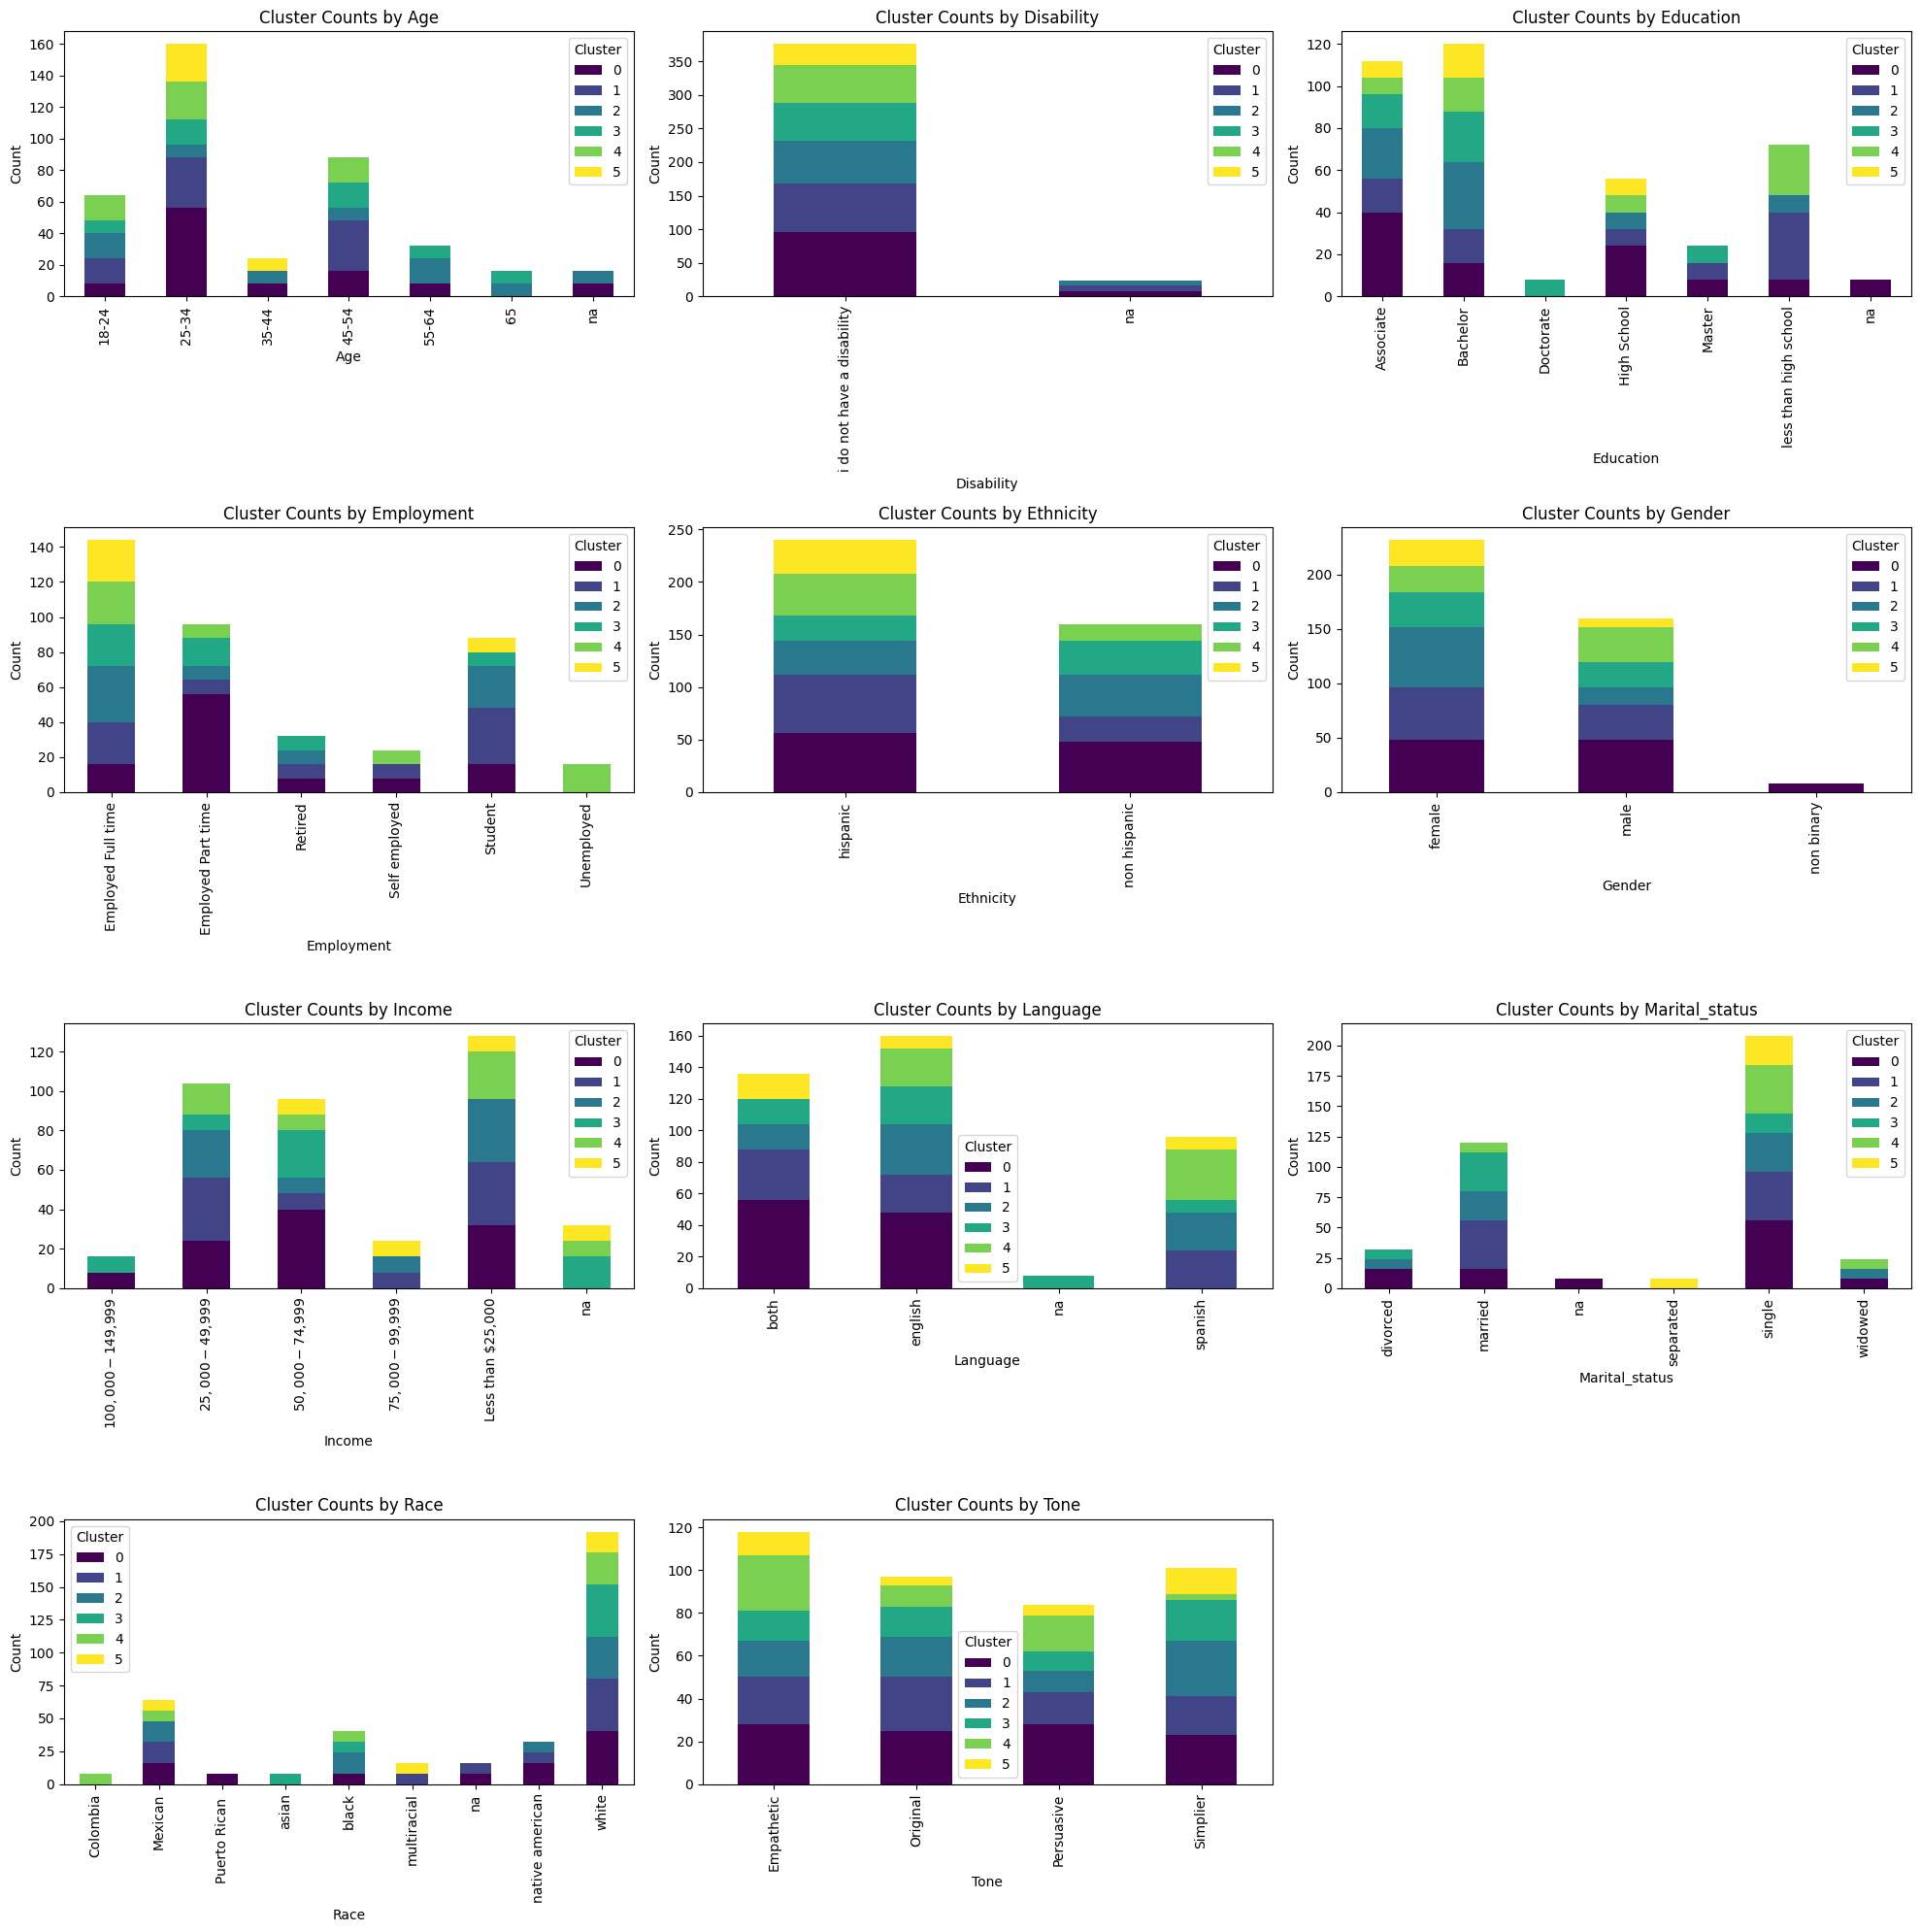

In [8]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    column_cluster_counts = df.groupby([column, 'Cluster']).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = column_cluster_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster Counts by {column.capitalize()}')
    ax.legend(title='Cluster')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

## TSNE

In [22]:
df_tsne = pd.read_excel('../datasets/tsne-tones-clusters.xlsx')

### Visualization by Cluster

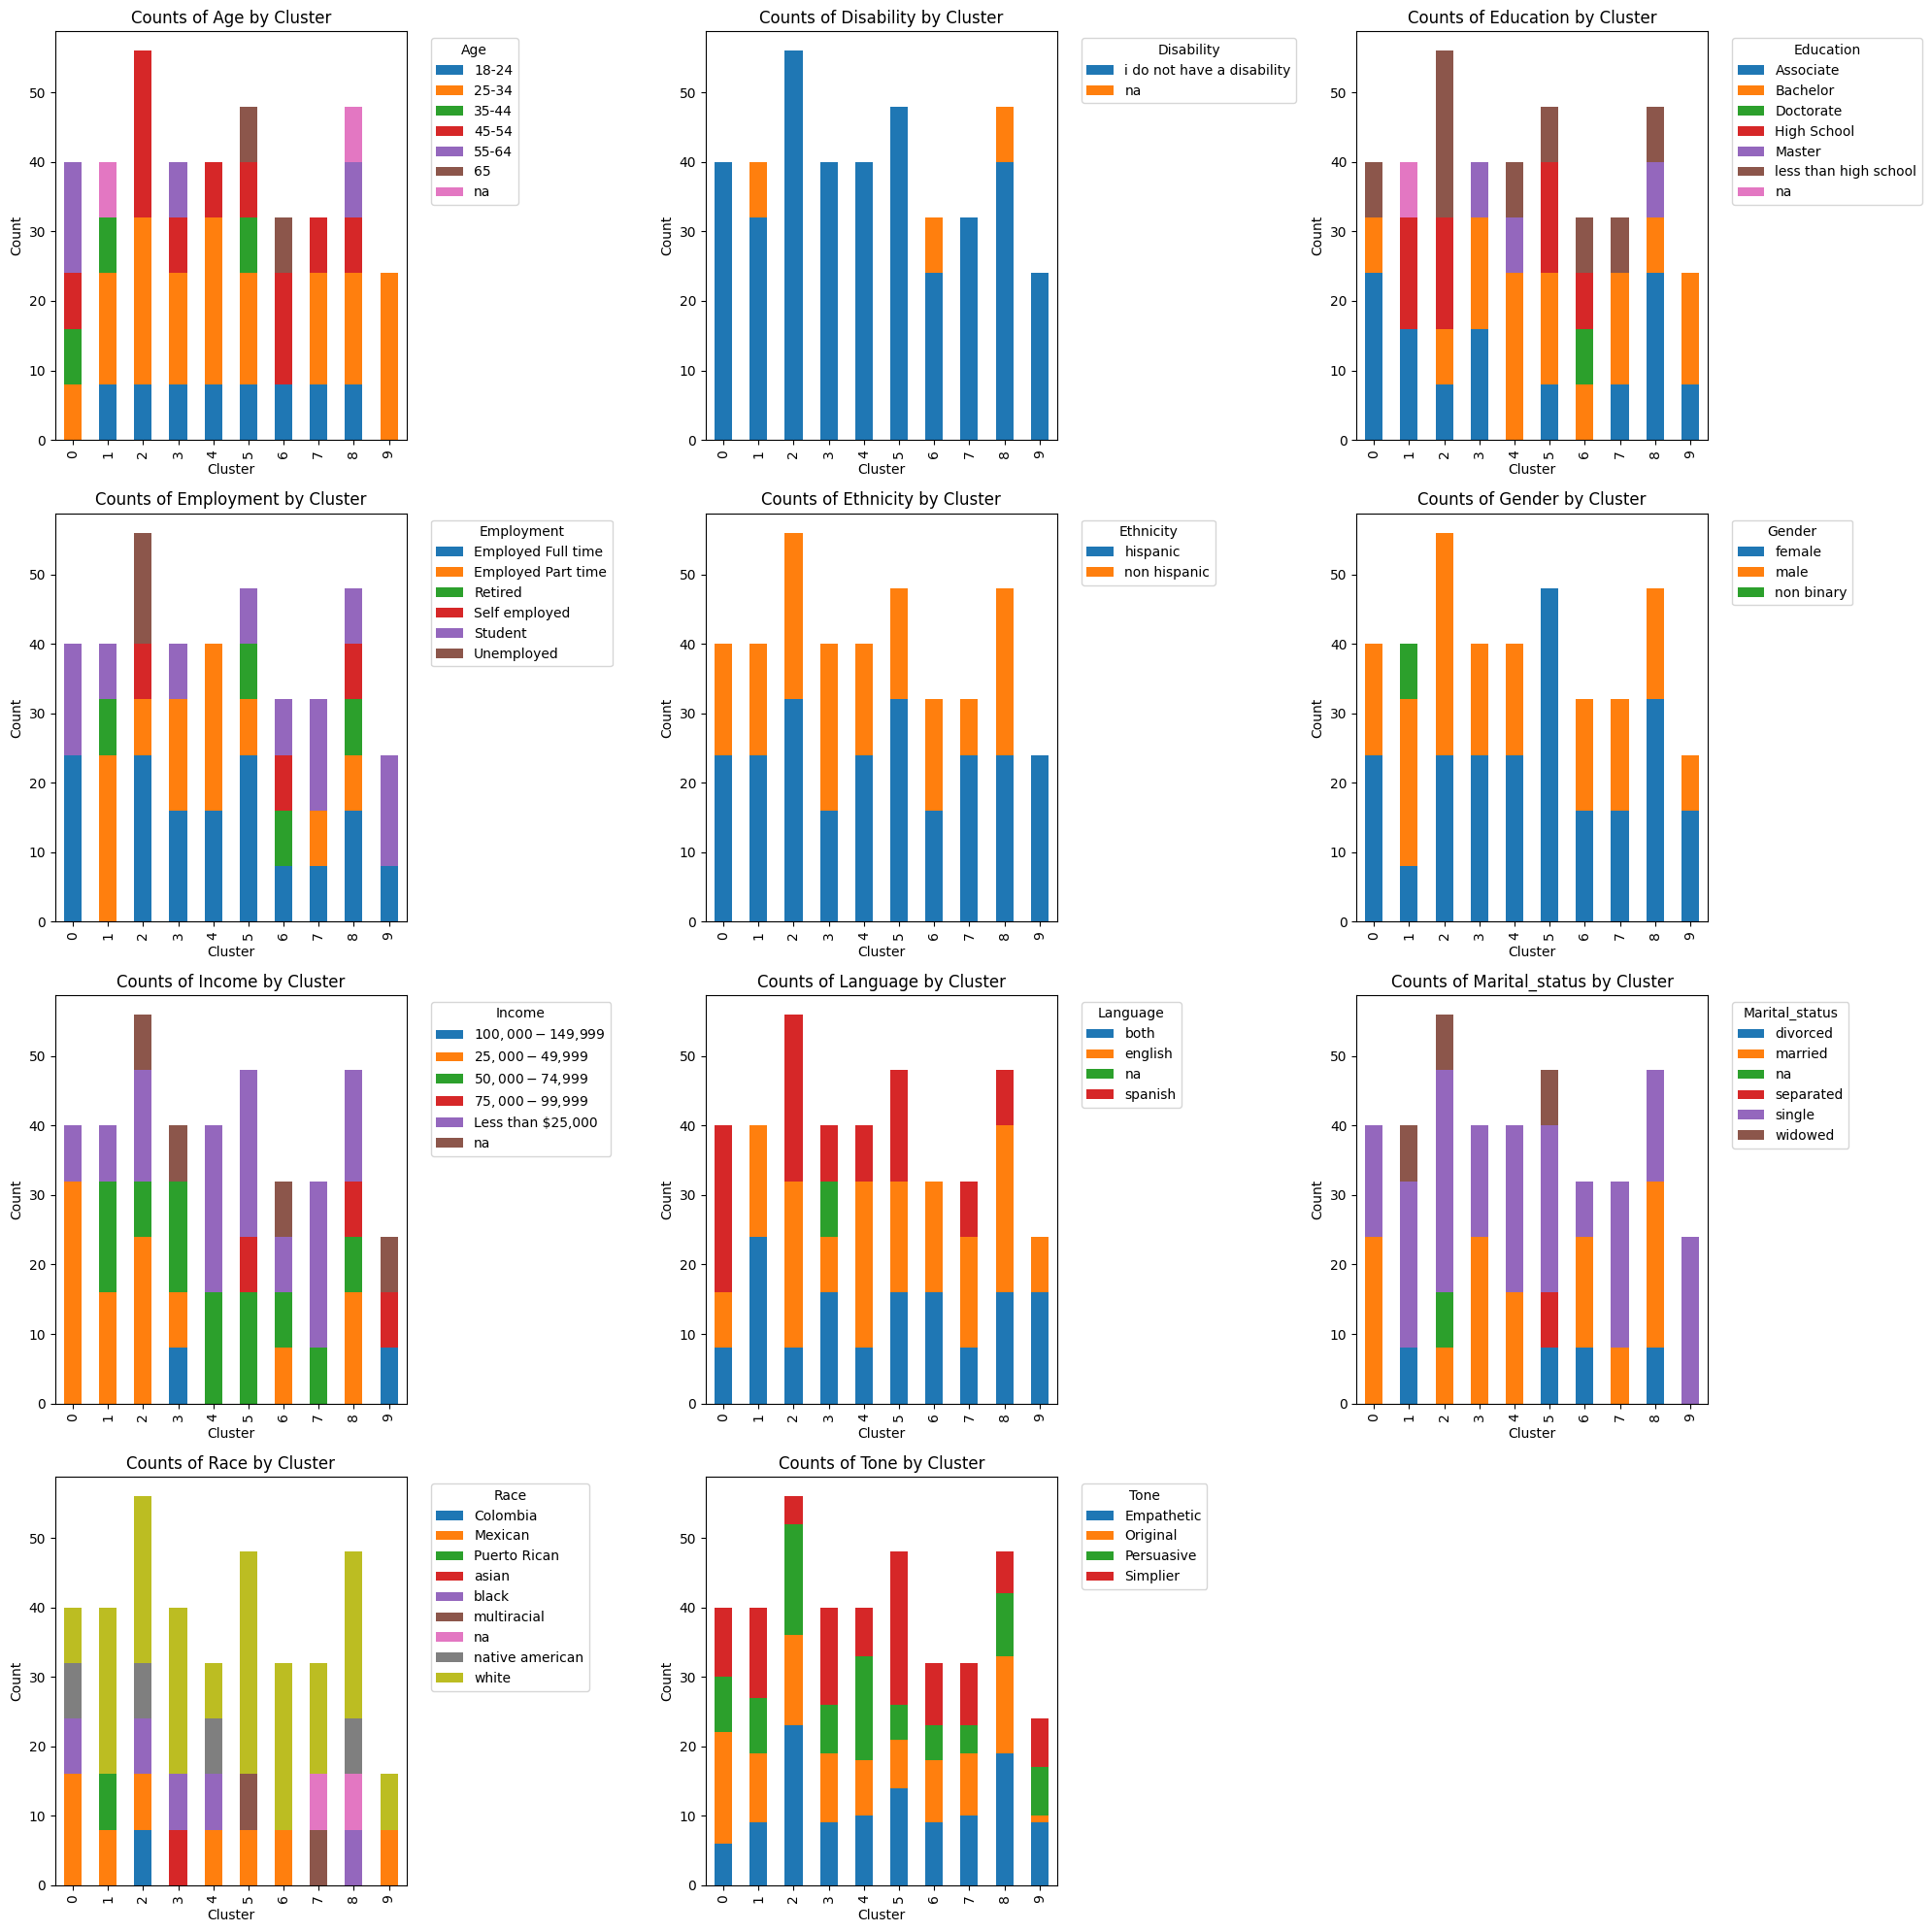

In [23]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = df_tsne.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

### Visualization by Attribute

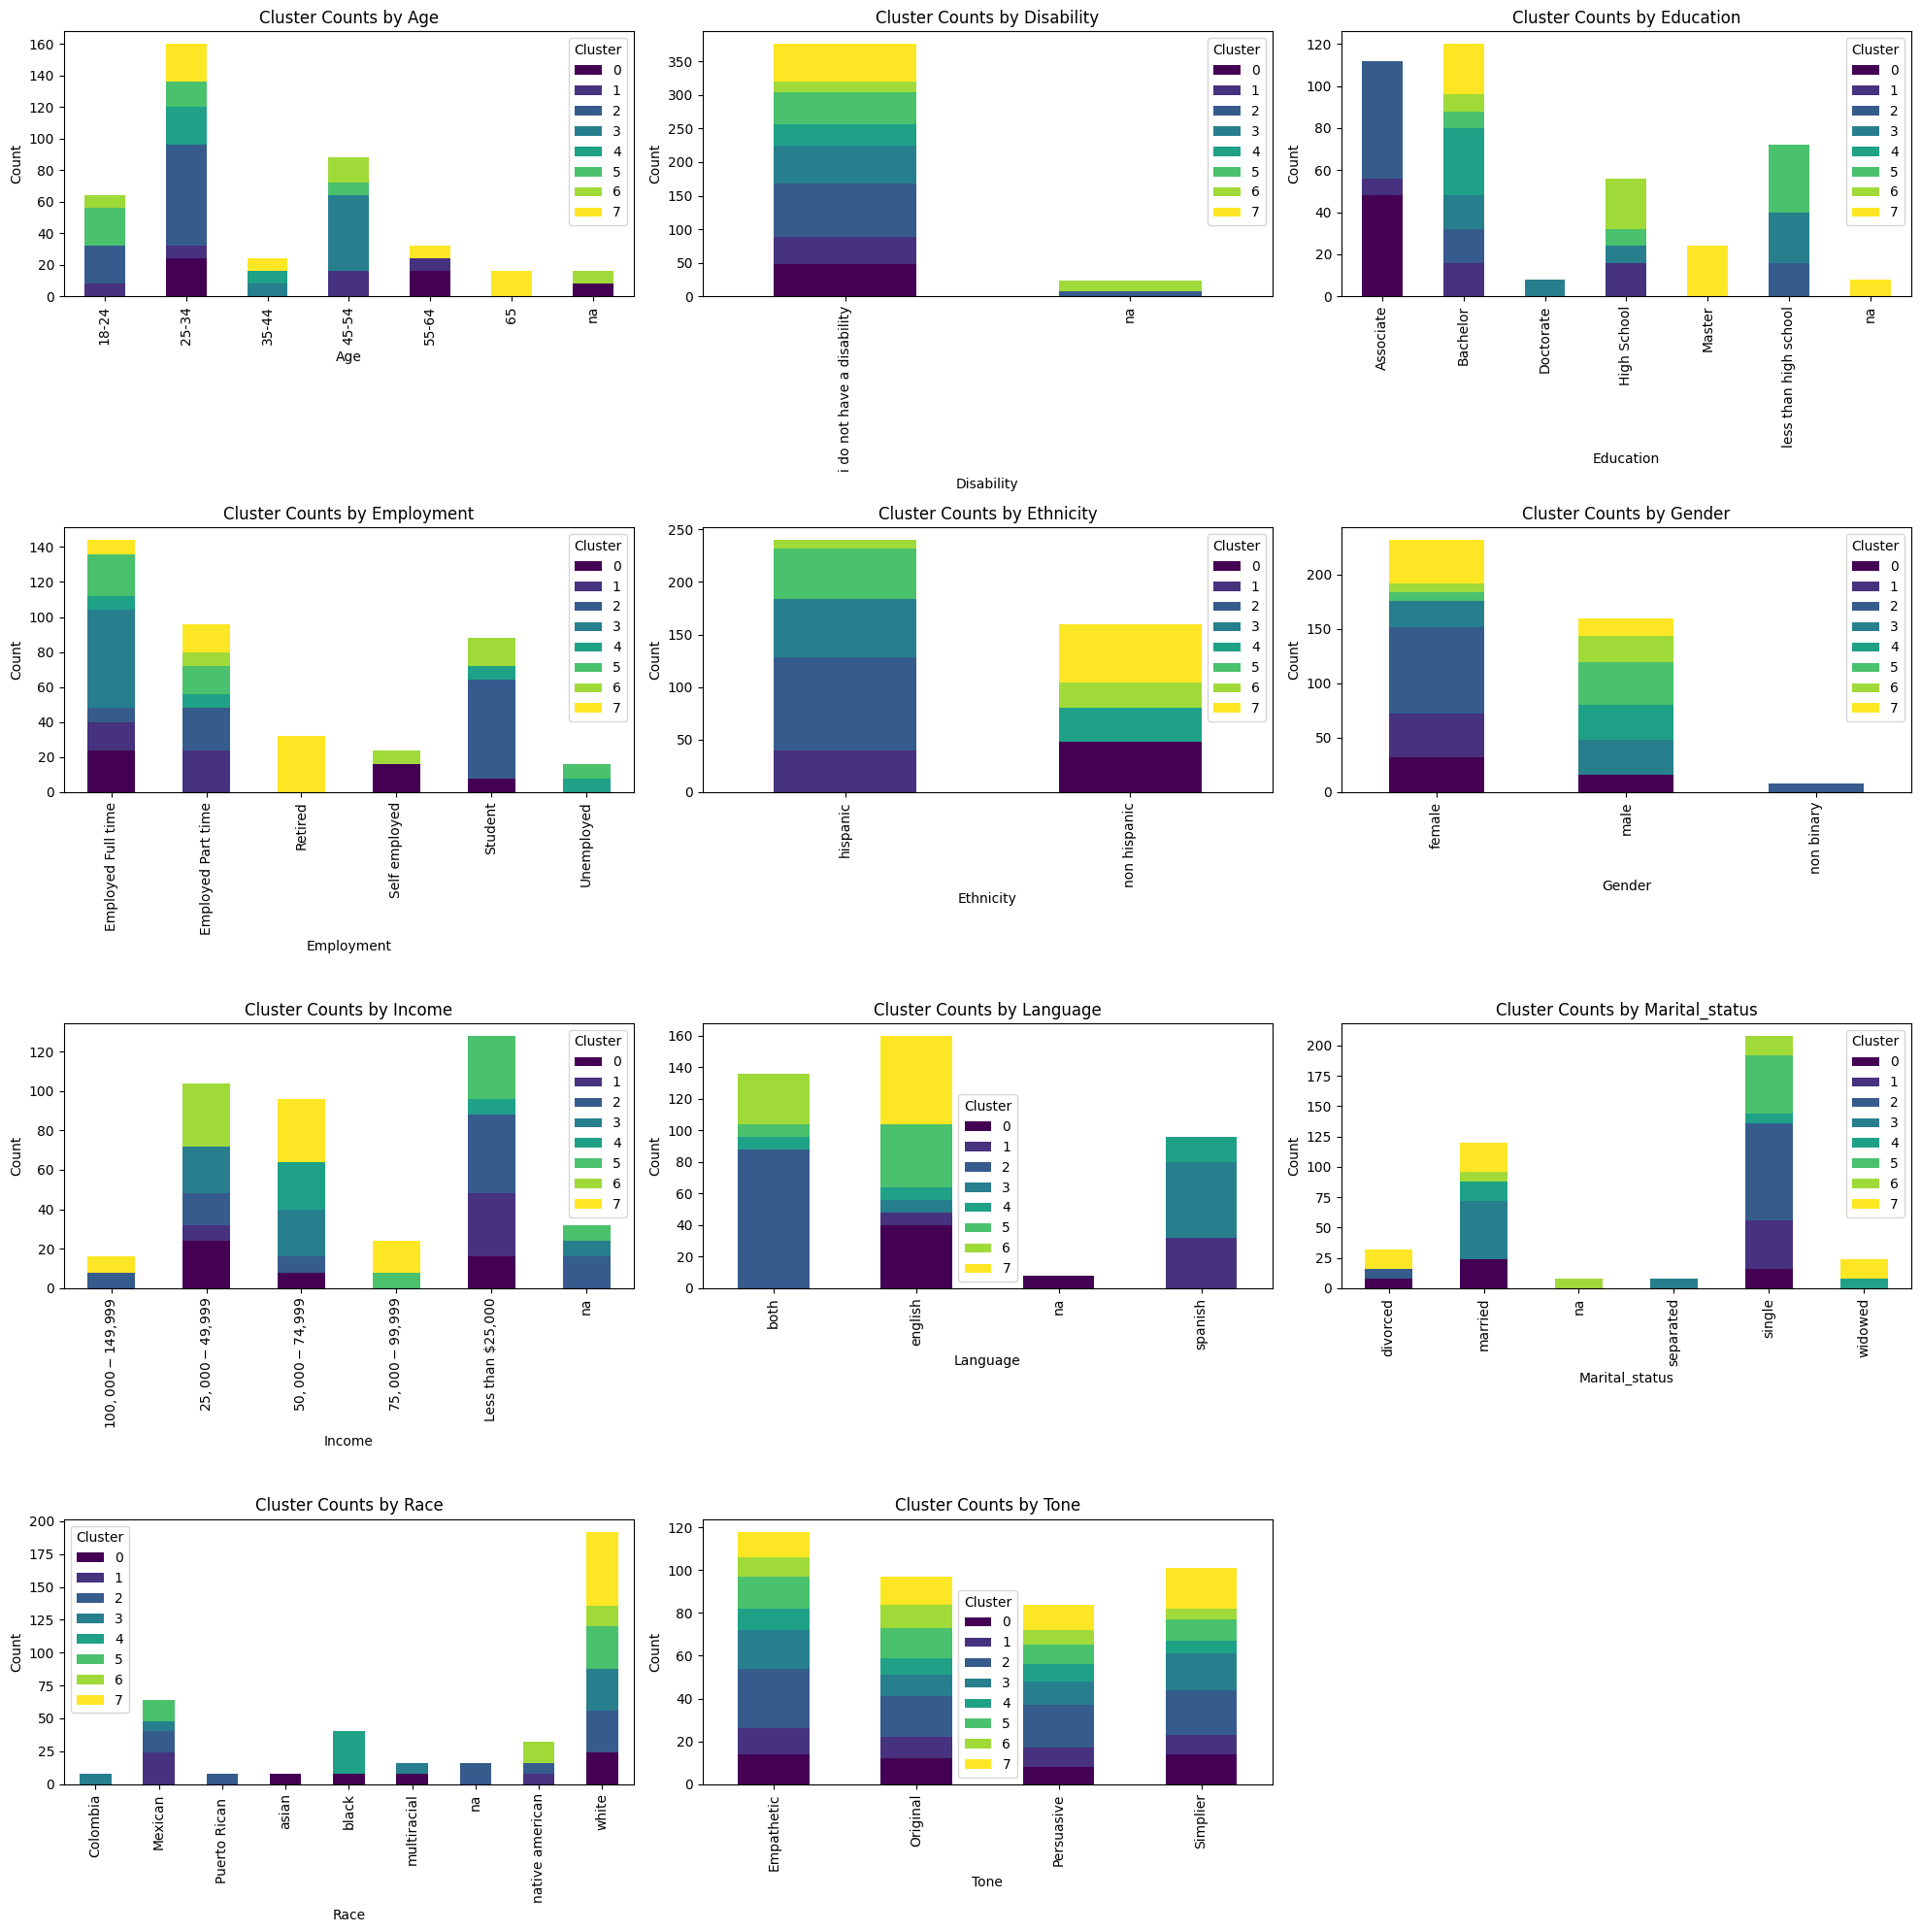

In [8]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    column_cluster_counts = df_tsne.groupby([column, 'Cluster']).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = column_cluster_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster Counts by {column.capitalize()}')
    ax.legend(title='Cluster')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

## UMAP

In [11]:
df_umap = pd.read_excel('../datasets/umap-tones-clusters.xlsx')

### Visualization by cluster

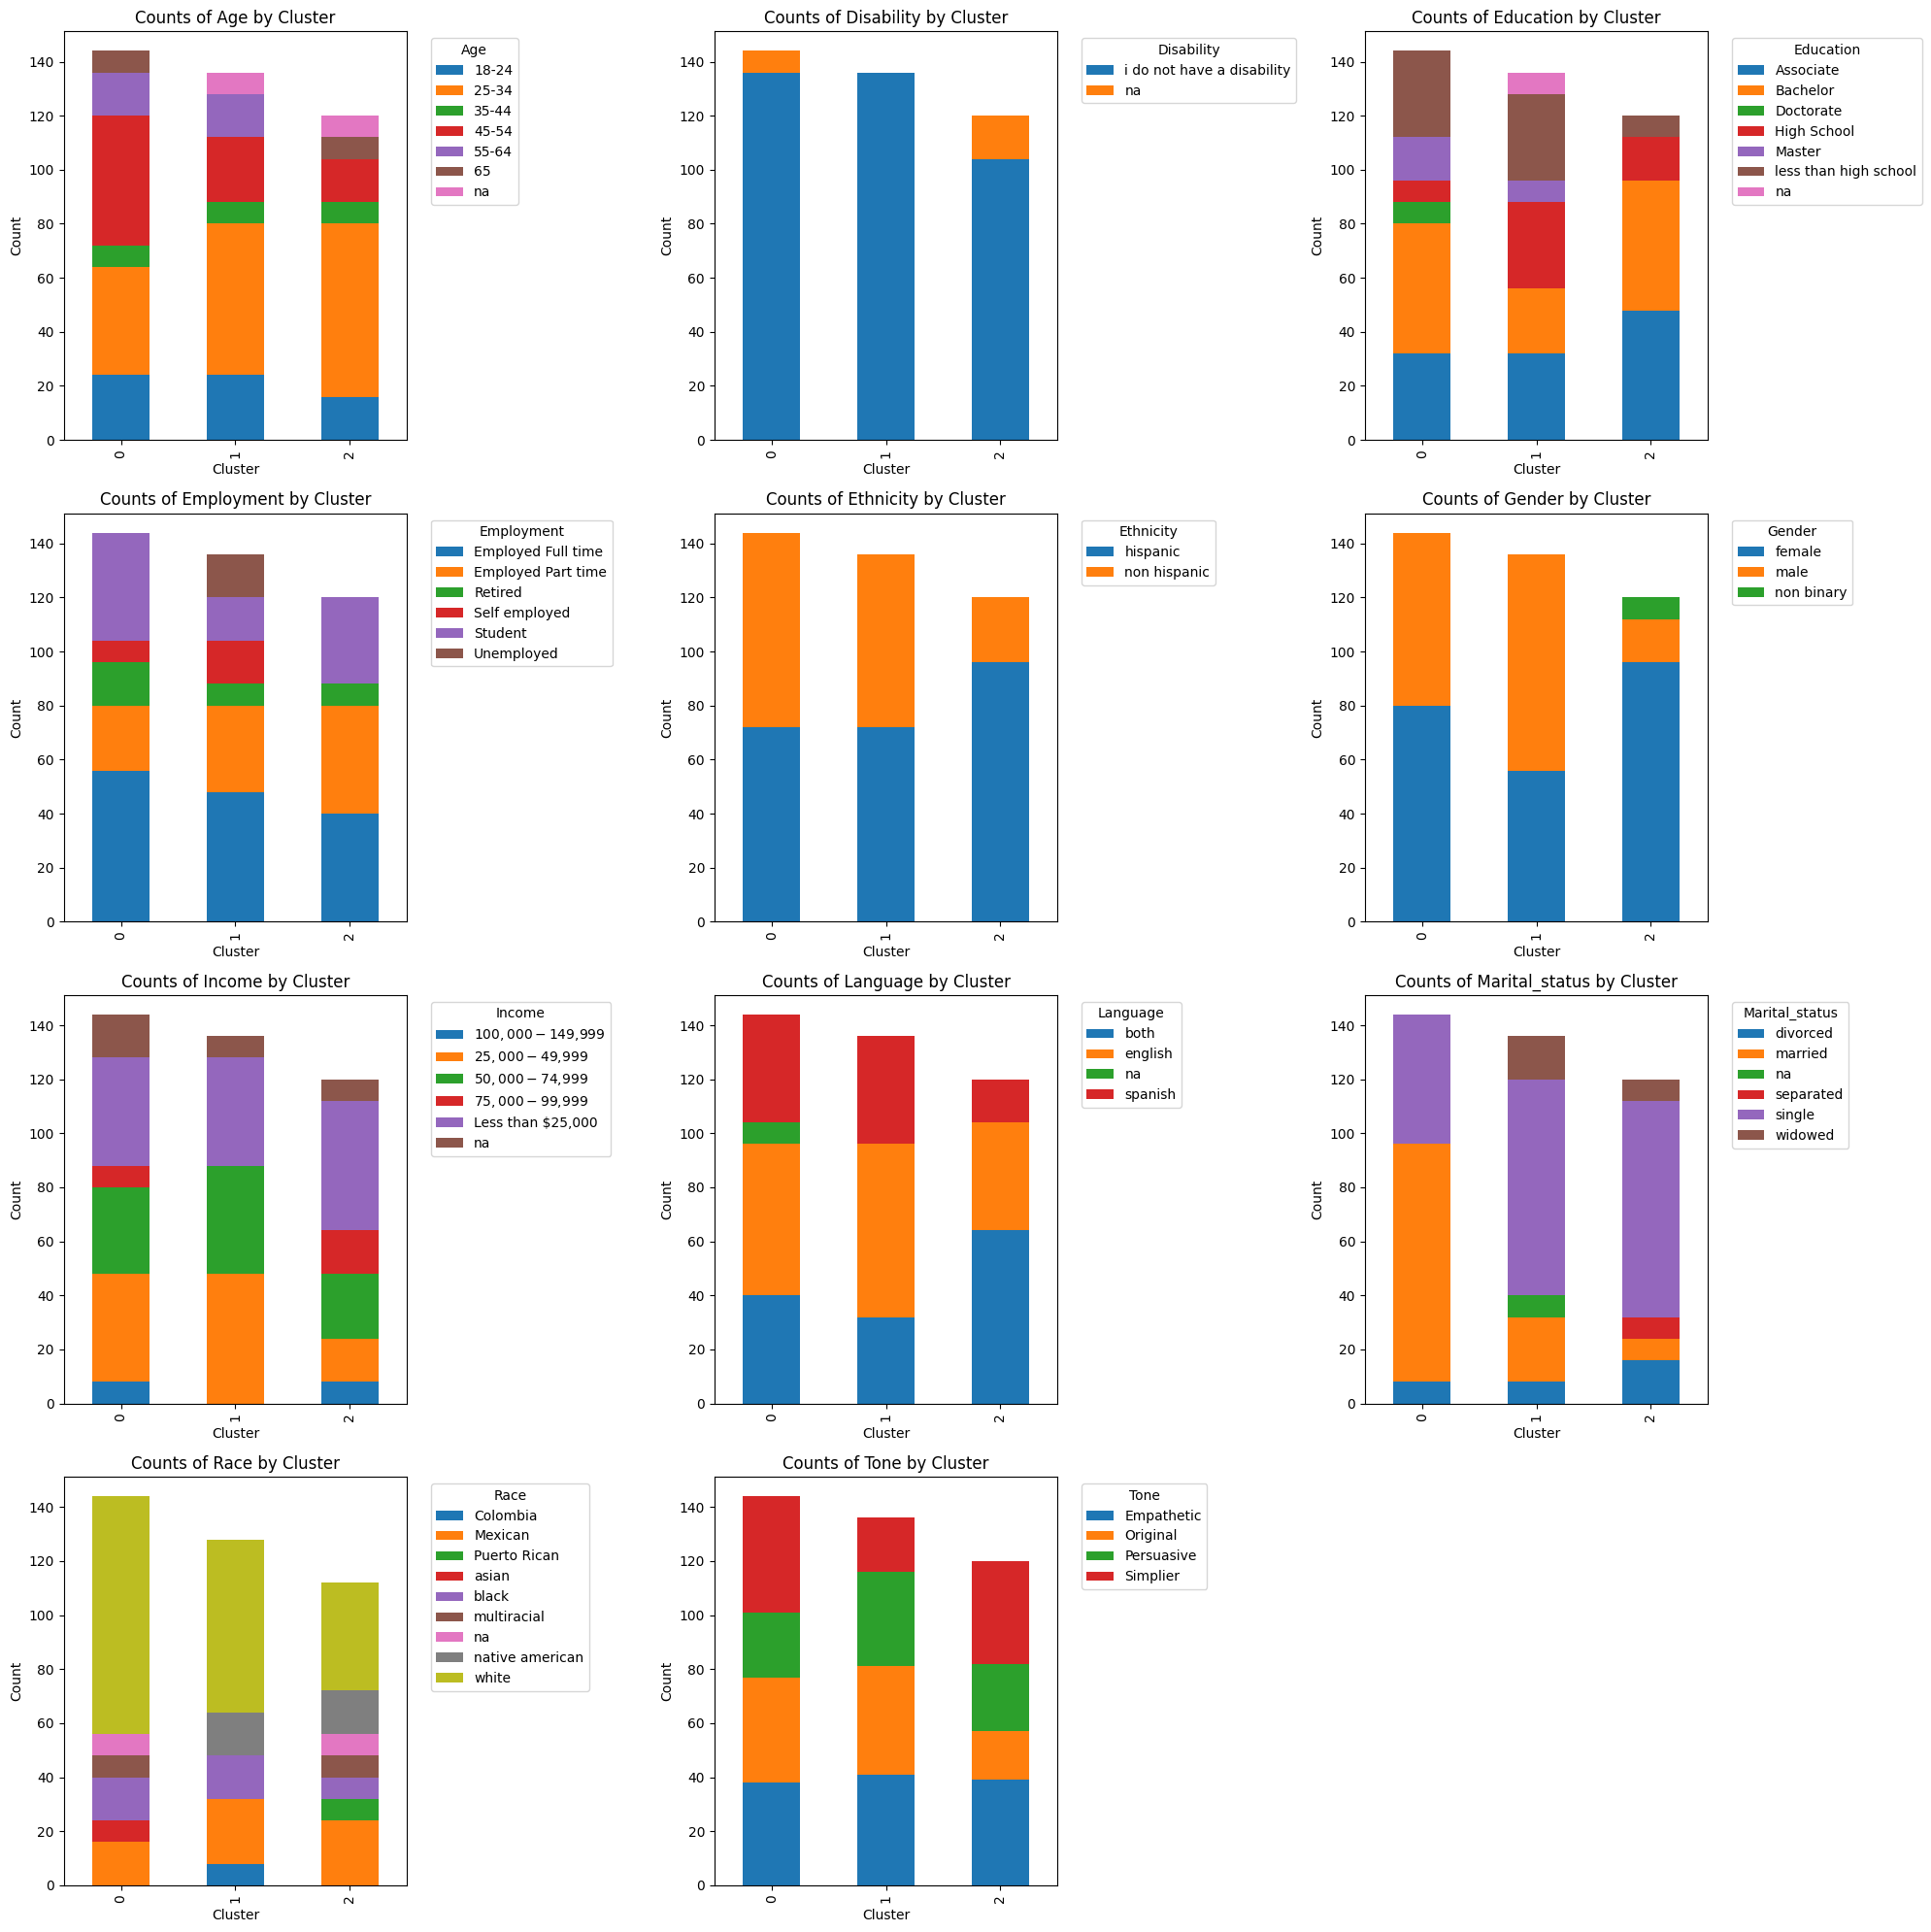

In [12]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = df_umap.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

### Visualization by attribute

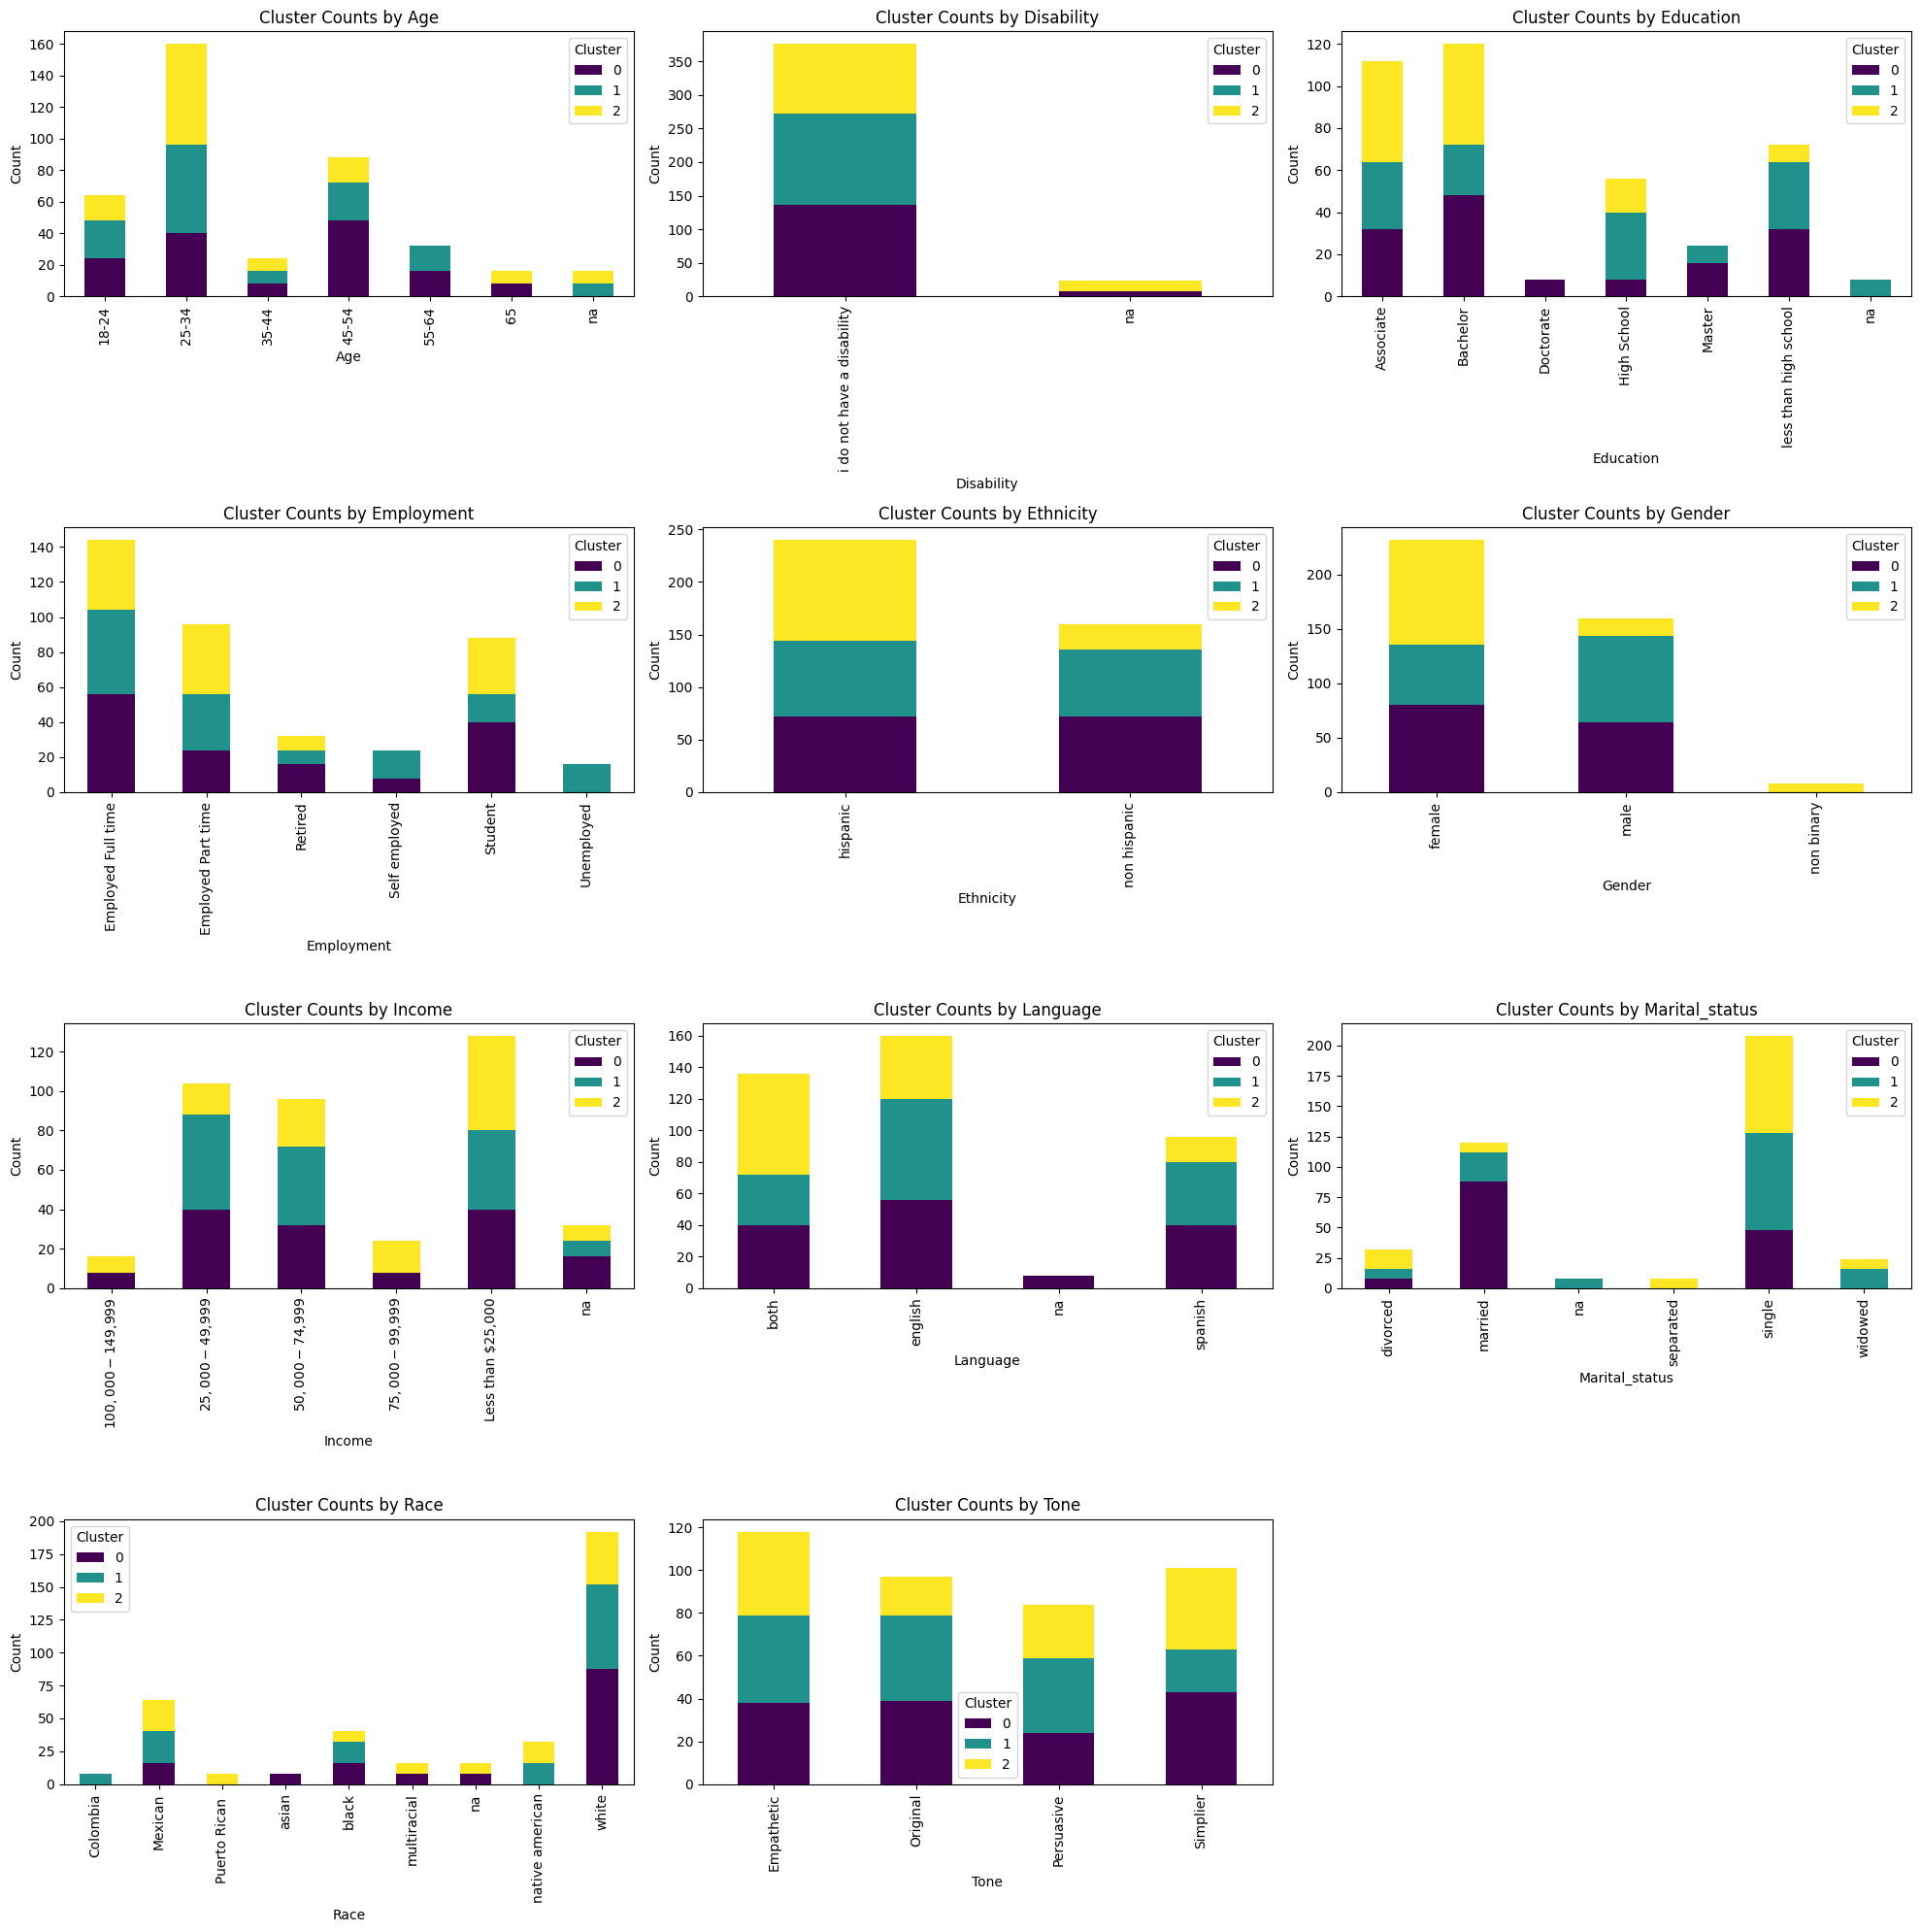

In [13]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    column_cluster_counts = df_umap.groupby([column, 'Cluster']).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = column_cluster_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster Counts by {column.capitalize()}')
    ax.legend(title='Cluster')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

In [15]:
import plotly.graph_objects as go

# Example data setup (you may need to adjust based on your actual data structure)
# Assuming df_umap has columns: 'Cluster', 'age', 'income', 'tone', and 'count'

# Aggregate the data for Sankey diagram
sankey_data = df_umap.groupby(['Cluster', 'age', 'tone']).size().reset_index(name='count')

# Prepare data for Sankey diagram
clusters = sankey_data['Cluster'].unique()
ages = sankey_data['age'].unique()
tones = sankey_data['tone'].unique()

# Create node labels
node_labels = list(clusters) + list(ages) + list(tones)

# Create node indices
cluster_indices = list(range(len(clusters)))
age_indices = list(range(len(clusters), len(clusters) + len(ages)))
tone_indices = list(range(len(clusters) + len(ages), len(node_labels)))

# Create links
links = {
    'source': [],
    'target': [],
    'value': []
}

for _, row in sankey_data.iterrows():
    cluster_idx = cluster_indices[clusters.tolist().index(row['Cluster'])]
    age_idx = age_indices[ages.tolist().index(row['age'])]
    tone_idx = tone_indices[tones.tolist().index(row['tone'])]
    
    links['source'].append(cluster_idx)
    links['target'].append(age_idx)
    links['value'].append(row['count'])

    links['source'].append(age_idx)
    links['target'].append(tone_idx)
    links['value'].append(row['count'])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=node_labels
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value']
    )
)])

fig.update_layout(title_text='Sankey Diagram of Demographics and Text Tone Preferences', font_size=10)
fig.show()


In [18]:
import plotly.express as px

# Example data setup (you may need to adjust based on your actual data structure)
tree_data = df_umap.groupby(['Cluster', 'age']).size().reset_index(name='count')

# Create the tree map
fig = px.treemap(tree_data, path=['Cluster', 'age'], values='count', color='Cluster', hover_data={'count': True, 'Cluster': True, 'age': True})

# Update traces to include labels for each segment
fig.update_traces(
    textinfo="label+value+percent entry",  # Customize the label display here
    hoverinfo="label+value+percent entry"  # Ensure hover info includes label and value
)

# Update layout for title and margins
fig.update_layout(
    title='Tree Map of Gender Distribution within Clusters',
    margin=dict(t=50, l=25, r=25, b=25)  # Adjust margins as needed
)

# Show the figure
fig.show()


In [19]:
import plotly.express as px

# Example data setup (you may need to adjust based on your actual data structure)
# Aggregate data for tree map
tree_data = df_umap.groupby(['Cluster', 'tone']).size().reset_index(name='count')

# Create tree map
fig = px.treemap(tree_data, path=['Cluster', 'tone'], values='count', color='Cluster', hover_data=['count'])
fig.update_layout(title='Tree Map of tone Distribution within Clusters')
fig.show()
